In [20]:
#  This project predict the customer churn in the dataset 'https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data'

#  Import the required libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn import neighbors
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import RandomOverSampler as ROS
from sklearn.linear_model import LogisticRegression as LR
import warnings
warnings.filterwarnings('ignore')

In [2]:
dat = pd.read_csv('Customer-Churn-Records.csv')  # Upload the dataset

dat.info()  # Check the dataset overall information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
dat.isna().sum()  # Check for missing values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [4]:
dat.sample(5)  # Randomly select and display 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7265,7266,15692718,Jackson,738,France,Female,38,7,0.00,2,0,0,69227.42,0,0,2,PLATINUM,677
3661,3662,15748639,Hayslett,497,Germany,Male,35,7,110053.62,2,1,1,92887.06,0,0,4,PLATINUM,748
7764,7765,15751177,Milne,685,Germany,Female,44,2,119657.53,1,1,0,145387.05,1,1,4,DIAMOND,646
4338,4339,15798439,Davidson,714,Spain,Male,25,2,0.00,1,1,1,132979.43,0,0,3,DIAMOND,484
4048,4049,15653715,Coates,602,France,Female,63,7,0.00,2,1,1,56323.21,0,0,4,PLATINUM,649


In [5]:
# Define the categorical data in the data sheet

cate_col = []

colum = dat.columns

# loop through the column to identify the column with object
for col in colum:
    
    # check if the dtype of the column is an object
    if dat[col].dtype  == 'object':
        
        # If yes, append it to obj_col list
        cate_col.append(col)

print("Categorical Column:", cate_col)

Categorical Column: ['Surname', 'Geography', 'Gender', 'Card Type']


In [6]:
# perform chi^2 independent test to select important categorical variable

for col in cate_col:
    sht = pd.crosstab(dat[col], dat['Exited'])
    if ss.chi2_contingency(sht)[1]<0.05:
        print(f'{col}: is important')
    else:
        print(f'{col}: is not convincingly important')
    

Surname: is not convincingly important
Geography: is important
Gender: is important
Card Type: is not convincingly important


In [7]:
# remove the categorical variables that are not convincingly important 
dat_up1 = dat.drop(['Surname', 'Card Type'], axis=1)

# Numeric variables
numeric = dat_up1.select_dtypes(exclude=['object']).columns.tolist()
numeric

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [8]:
# Feature engineerin of some variables

dat_up2 = pd.get_dummies(dat_up1, columns = ['Geography', 'Gender'], dtype = "int" )
dat_up2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   CreditScore         10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Point Earned        10000 non-null  int64  
 14  Geography_France    10000 non-null  int64  
 15  Geography_Germany   10000 non-null  int64  
 16  Geogr

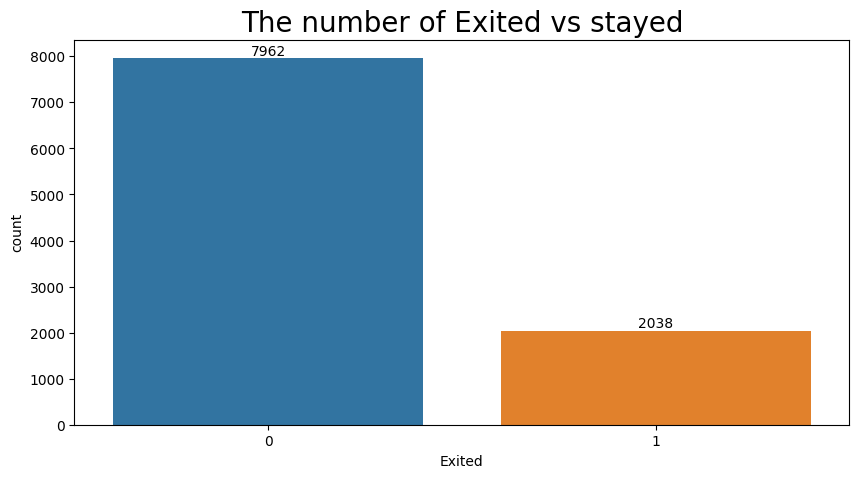

In [9]:
# Check if the dependent variable is balance or not balance by visalization

plt.figure(figsize = (10,5))
count= sb.countplot(data = dat_up2, x = 'Exited')
plt.title('The number of Exited vs stayed', size = 20)  # Plot the number of the exited and stayed customers
# function to label the count on the chart
for i in count.containers:
    count.bar_label(i)  # Put the data label on the bar

In [10]:
# Integrate additional information into the data part A

conditn = [(dat_up2['Exited'] == 0), 
            (dat_up2['Exited'] == 1)
          ]  # Sub-condition
   
val = [12, 24]  # Values to be selected with each sub-condition respectively
dat_up2['Required_hours'] = np.select(conditn, val)  # Create a feature 'Transaction _fee' in the upd_dat using the condition and values 
dat_up2.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Required_hours
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,24
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,12
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,24
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,1,0,12
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,1,0,12


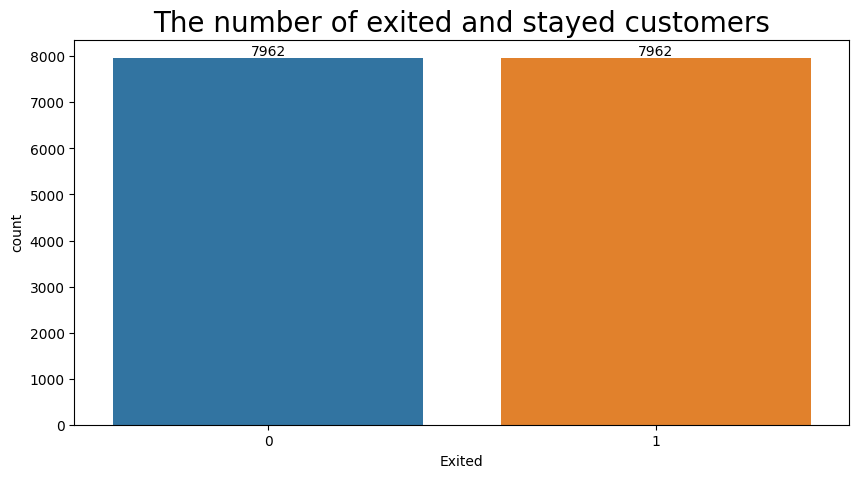

In [11]:
# Separate the dependent (target) and the independent variables

y = dat_up2['Exited']  # This is the target variable
inp_var = dat_up2.drop('Exited', axis=1)  # This are the independent variables
x = inp_var

# The target variable is 'success' with 2 imbalance classes as visualized above
# The code section below explicitly details the under-sampling tecqniques using imblearn library
# This is necessary to avoid learning bias for the possible algorithms for the modelling

rand_over_samp = ROS(random_state=42)
x_rand_o_samp, y_rand_o_samp = rand_over_samp.fit_resample(x, y)  # model the random sampling to balance counts

# Visualizing the target variable now to affirm if the two classes (0, 1)are balance now

balnc_dat = pd.concat([x_rand_o_samp, y_rand_o_samp], axis = 1)  # This code line join both datasets by column

# Explore if there is imbalance in the target variable class.
# This will avoid posibilities of the learning model bias 

# for the model  algorithms

plt.figure(figsize=(10, 5))
count = sb.countplot(data=balnc_dat, x = 'Exited')
plt.title('The number of exited and stayed customers', size = 20)

# Loop function to label the count on the bar chart

for i in count.containers:  # This loops on the counted numbers, stored in the contatiners for each class
    count.bar_label(i)  # Uphold and display the counted numbers on the bar chart as a data label

Text(0.5, 1.0, 'Pairwise correlation of each feature')

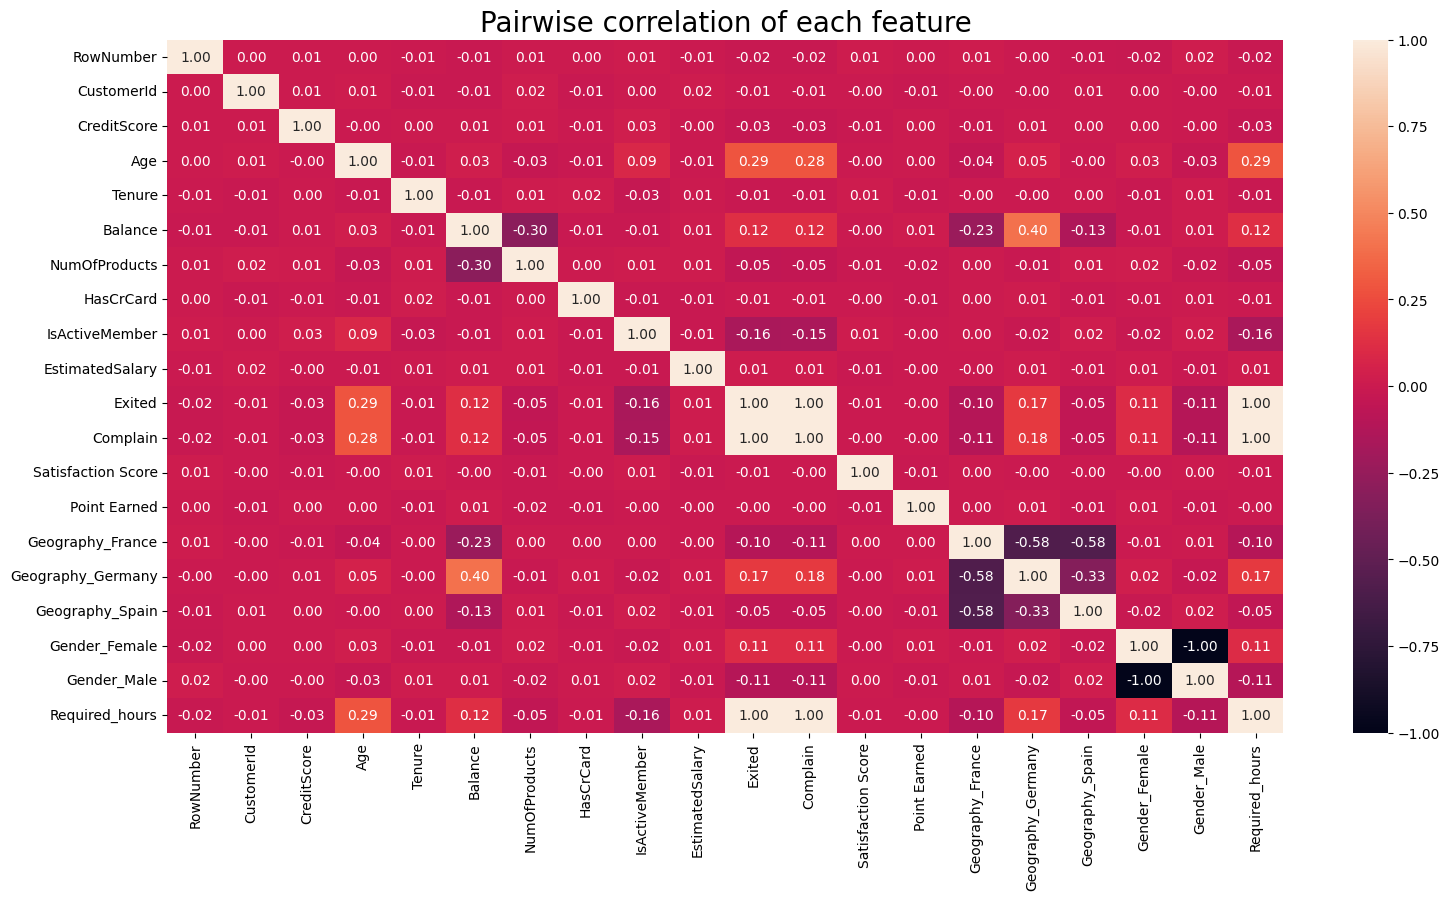

In [12]:
# Check for the correlation of the correlation
plt.figure(figsize=(18, 9))
sb.heatmap(dat_up2.loc[:, :].corr(), annot =True, vmin = -1, vmax= 1, fmt = '.2f')
plt.title('Pairwise correlation of each feature', size = 20)

Text(0.5, 1.0, 'Significance of each feature on exited cutomers')

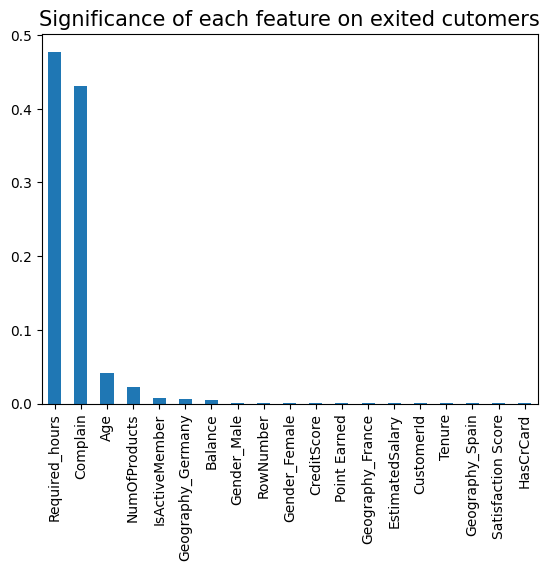

In [16]:
# Feature Selection of important features for the modelling
# Having check the corrrelation above, some features are seemling not promising
# Model based feauture selection will be performed using random forest

# Split dataset to train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_rand_o_samp, y_rand_o_samp, test_size = 0.2) 

# Model with random forest algorithm
RFC_model = RFC(n_estimators = 1000)  
RFC_model.fit(x_train, y_train)
y_predict = RFC_model.predict(x_test)

# Plot the significance probability of each feature
feat_impt = pd.Series(RFC_model.feature_importances_, index=x_train.columns).sort_values(ascending= False)
feat_impt.plot(kind='bar')
plt.title('Significance of each feature on exited cutomers', size = 15)

In [17]:
model_xROS = x_rand_o_samp.drop(columns = ['Geography_Germany', 'RowNumber', 'Point Earned', 'EstimatedSalary', 
                                            'CreditScore','CustomerId', 'Tenure', 'Geography_France', 'Gender_Female', 
                                           'Gender_Male', 'Satisfaction Score', 'Geography_Spain', 'HasCrCard']
                                 )  # This are the selected features as the independent variables for the model
x1 = model_xROS['Complain']

x_train, x_test, y_train, y_test = train_test_split(x1, y_rand_o_samp, test_size = 0.2) 
# Change the value of feature 'Complain' from one dimensional array to two dimensional array
x1_train = np.reshape(x_train, (-1, 1))
x1_test = np.reshape(x_test, (-1, 1))
print(x1_train.shape, x1_test.shape)

logist_reg = LR()
logist_reg.fit(x1_train, y_train)

(12739, 1) (3185, 1)


LogisticRegression()

Accuracy:  0.998116169544741
Precision:  0.9987944544906571
Recall:  0.9975918121613486


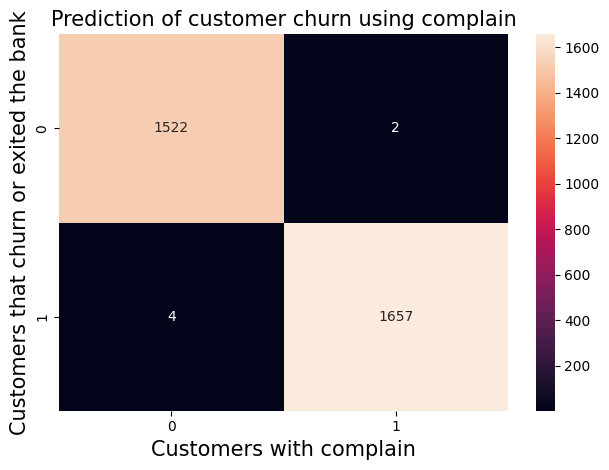

In [18]:
# Evaluate the logistic regression model

y_predict = logist_reg.predict(x1_test)


def metric_statistics(y_test, y_predict):
    print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
    print('Precision: ', metrics.precision_score(y_test, y_predict))
    print('Recall: ', metrics.recall_score(y_test, y_predict))
          
metric_statistics(y_test, y_predict)

# Visualize the confusion matrix

conf_mat = metrics.confusion_matrix(y_test, y_predict)
conf_mat_tab = pd.DataFrame(conf_mat)
values = [0,1] # The categories of valuesh = 0.03  # Size of the mesh
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1

fig, ax = plt.subplots()

sort_values = np.arange(len(values))
plt.xticks(sort_values, values)
plt.yticks(sort_values, values)
sb.heatmap(conf_mat_tab, annot = True, fmt = 'g')

plt.title('Prediction of customer churn using complain', size = 15)
plt.xlabel('Customers with complain', size = 15)
plt.ylabel('Customers that churn or exited the bank', size = 15)

plt.tight_layout()

(12739, 1) (3185, 1)


Text(0.5, 1.0, 'Prediction of customer churn using decision tree classifier')

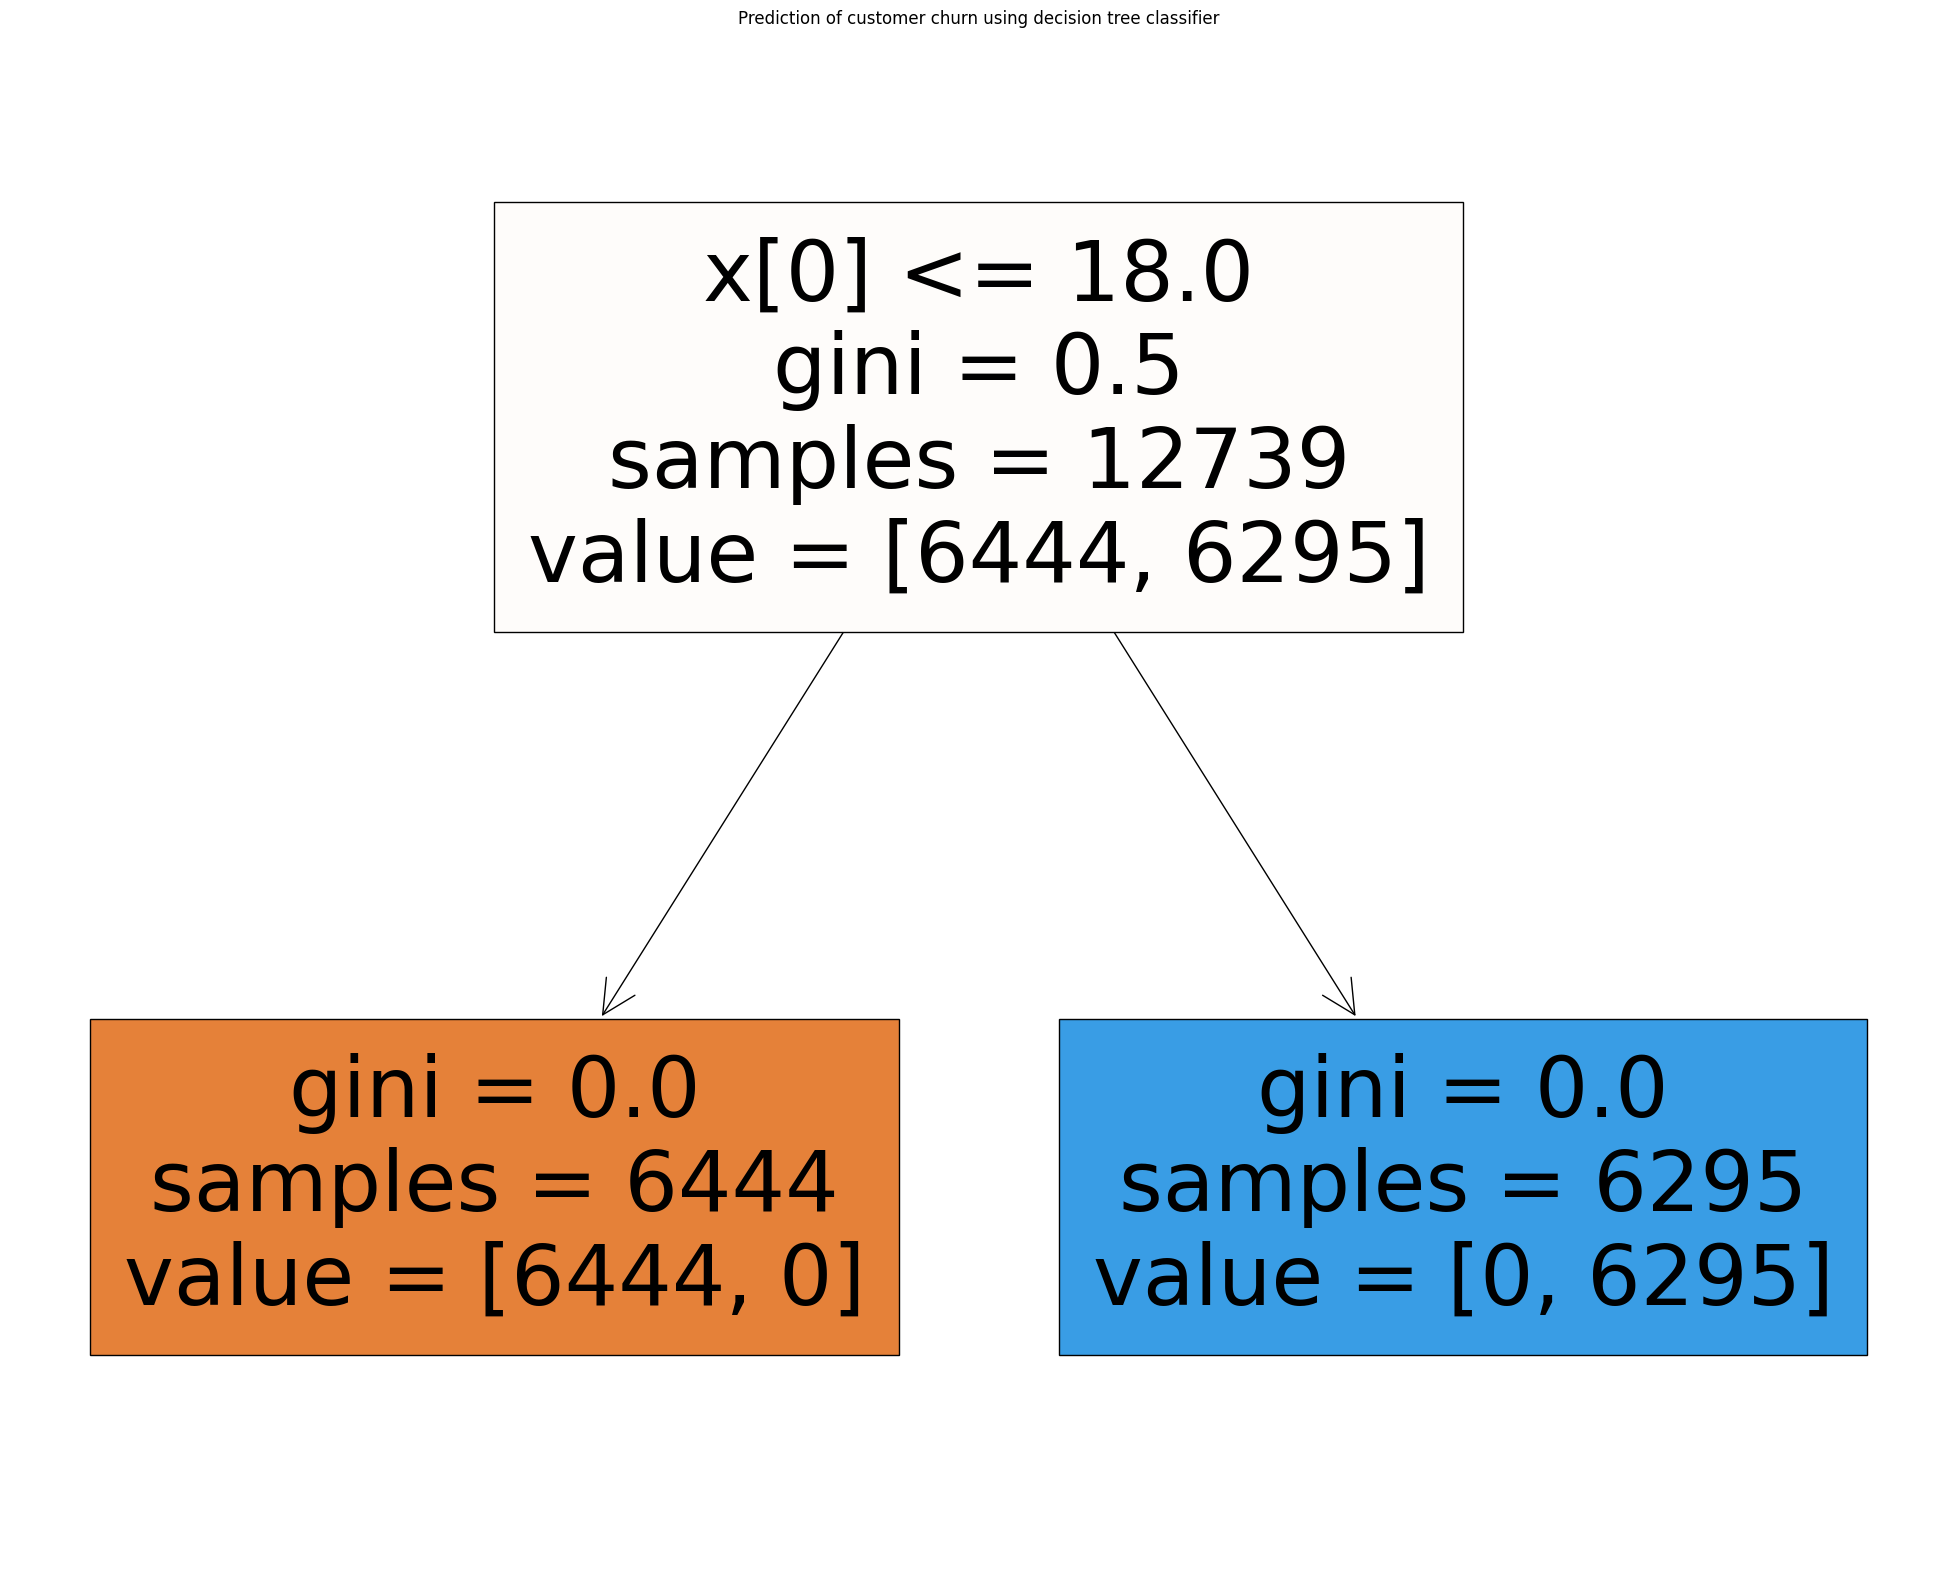

In [24]:
# Model with the required time 

x2 = model_xROS['Required_hours']
x2_train, x2_test, y1_train, y1_test = train_test_split(x2, y_rand_o_samp, test_size = 0.2) 

# Change the value of feature 'Complain' from one dimensional array to two dimensional array
x21_train = np.reshape(x2_train, (-1, 1))
x21_test = np.reshape(x2_test, (-1, 1))
print(x21_train.shape, x21_test.shape)

DTC = DecisionTreeClassifier()
model = DTC.fit(x21_train, y1_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTC, filled=True)  # Plot the tree

plt.title('Prediction of customer churn using decision tree classifier')

In [22]:
# Evaluate the decision tree model

y1_predict = DTC.predict(x21_test)

def metric_statistics(y1_test, y1_predict):
    print('Accuracy: ', metrics.accuracy_score(y1_test, y1_predict))
    print('Precision: ', metrics.precision_score(y1_test, y1_predict))
    print('Recall: ', metrics.recall_score(y1_test, y1_predict))
          
metric_statistics(y1_test, y1_predict)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


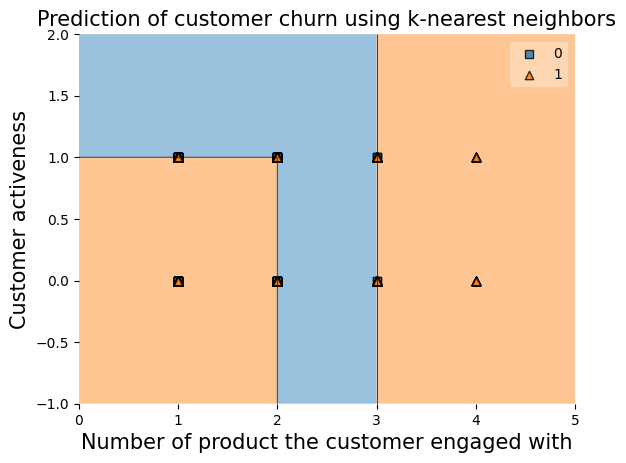

In [25]:
x31 = model_xROS[['NumOfProducts','IsActiveMember']]

x32_train, x32_test, y21_train, y21_test = train_test_split(x31, y_rand_o_samp, test_size = 0.2)


knn = neighbors.KNeighborsClassifier()
knn.fit(x32_test, y21_test)
plot_decision_regions(x32_test.to_numpy(), y21_test.to_numpy(), clf = knn)

plt.title('Prediction of customer churn using k-nearest neighbors', size = 15)
plt.xlabel('Number of product the customer engaged with', size = 15)
plt.ylabel('Customer activeness', size = 15)
plt.show()